In [84]:
#Nick Staich

Project 1 - Final (Core)
This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse.  
3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.
4) To finalize this project, you need to prepare an executive (non-technical) presentation about your project.

Create a slide deck for a non-technical audience presenting this data, your analysis, and model recommendations.
Do not include data cleaning, pre-processing, or exploration steps in your presentation.
Do include 2 insights from your analysis supported with appropriate "reporting" quality visuals.
Prepare a short (5 minute) audio presentation using your slides (Google Slides, PowePoint, etc). 
Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.  Your presentation requires audio, but video is optional.
Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. Think of this as an executive summary or an overview of your project.
Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.
Commit all of your work to GitHub and turn in a link to your GitHub repo with your final project. Make sure you include your presentation slides and recording on your GitHub repo as well.

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

filename = '/content/drive/My Drive/Coding Dojo/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 1) How many rows and columns?

In [87]:
#Determine the dataset's row & column counts
df.shape

(8523, 12)

Using df.shape, it is clear that this data set has 8523 observations across 12 features.

# 2) What are the datatypes of each variable?

In [88]:
#Determine the dataset's datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# 3) Are there duplicates? If so, drop any duplicates.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [90]:
duplicate = df[df.duplicated()]
duplicate

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There do not seem to be any duplicated rows...YAY!

# 4) Identify missing values.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


It is clear from df.info() that we have some work to do in the Item_weight and Outlet_Size features, as they have values less than the total count of observations.

## Item_Weight missing data correction

In [92]:
#Identify the missing values in Item_Weight
df['Item_Weight'].isna().value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

It is confirmed that there are 1463 observations missing data in the 'Item_Weight' feature, 17% of all entries.

In [93]:
#Get the rows where 'Item_Weight' is NaN
item_weight_miss = df['Item_Weight'].isna()
df.loc[item_weight_miss, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


## Outlet_Size missing data correction

In [94]:
#Identify the missing values in Outlet_Size
df['Outlet_Size'].isna().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

It is confirmed that there are 2410 observations missing data in the 'Outlet_Size' feature, 28% of all entries are corrupted. 

(Yes, I could have invoked the .sum() method, but I like this way because I can see that the total data values equal 100%)

In [95]:
#Get the rows where 'Outlet_Size' is NaN
outlet_size_miss = df['Outlet_Size'].isna()
df.loc[outlet_size_miss, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Let's see how many rows are missing both values:

In [96]:
#Let's see how many rows are missing both values:
clean = df.loc[item_weight_miss & outlet_size_miss,:]
clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Welp...it couldn't be that easy, could it.

# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

## Determine Approach to cleansing Item_Weight

In [97]:
#Determine Approach to cleansing 'Item_Weight'
#Get the rows where 'Item_Weight' is NaN
#item_weight_miss = df['Item_Weight'].isna()
#df.loc[item_weight_miss, :]

# *** - I commented out this part later as I determined I could use SimpleImputer to fix the dataset, and use it in the ML model later.  I'm leaving the code for posterity when I read back through this.
#Item_Weight_Mean = df['Item_Weight'].mean()  #Based on Will's feedback, I changed my approach and am calculating the mean of Item Weights into a variable that I can pass into the replace method.
#Item_Weight_Mean

#df['Item_Weight'].fillna(12.858, inplace=True)
#df['Item_Weight']

#df['Item_Weight'].value_counts()
# ***
#Fixed the values with a mean value to preserve the data instead of tossing it.

df['Item_Weight'].describe

<bound method NDFrame.describe of 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64>

We need to look at the distribution of values for item weight to determine the best means of resolving the Item Weight missing values.  


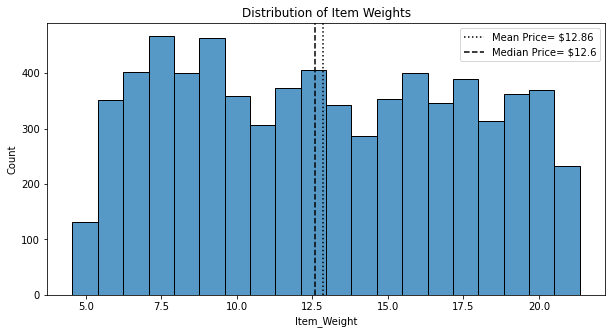

In [98]:

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Weight', ax=ax)
ax.set(title='Distribution of Item Weights');

## Annotating mean and median
mean_price = df['Item_Weight'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = df['Item_Weight'].median()
ax.axvline(med_price,color='k', ls='--', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend();

The data seems normally distributed, and the mean and median values are in close proximity, but seem slightly wqeighted in count to the left, so we will use the Median value (12.60) instead of the Mean value (12.86).  

After we do our train test split, we will have to use simpleImputer to replace the values with the median value.

##Determine Approach to cleansing Outlet_Size

In [99]:
#Determine Approach to cleansing Outlet_Size
check1 = df['Outlet_Identifier']=='OUT010'
df.loc[check1,:]
check1.value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

OK, so this 1 outlet 'Out010' is missing 555 'Outlet_Size' observations, roughly 20% of the missing values, but would contribute 5555 other observations to the data model.  That said, there are still 1600 missing entries in that column, which is categorical and seems only loosely corellated to sales volume, and I am not sure if the outlet size would be as impactful in later modeling.  I think the best bet would be to remove the 'Outlet_Size' column altogether.

In [100]:
#Determine Approach to cleansing Outlet_Size
check1 = df['Outlet_Identifier']=='OUT019'
df.loc[check1,:]
check1.value_counts()

False    7995
True      528
Name: Outlet_Identifier, dtype: int64

In [101]:
# EDIT: At a later stage of this project I had learned about imputing categorical data with 'most frequent' which will be better than losing the rest of the data set.
#dropping the columns from the dataframe as we've discussed
#df = df.drop(columns=['Outlet_Size'])
#df.head()

In [102]:
df['Outlet_Size'].value_counts()  


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [103]:
df['Outlet_Size'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

# 6) Confirm that there are no missing values after addressing them.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [105]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

There do not seem to be any inconsistencies in the nomenclature.  There are semantic discussions to be had around naming conventions and personal preferences ('Outlet_Establishment_Year' instead of 'Founded', I mean, really...?) but from an overall performance standpoint these category labels are both readable, consistent in convention, and informative with respect to their content.

Let's check within the columns themselves, to ensure the data is properly cleansed.

In [106]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [107]:
IFC = df.value_counts(['Item_Fat_Content'])
IFC

Item_Fat_Content
Low Fat             5089
Regular             2889
LF                   316
reg                  117
low fat              112
dtype: int64

Yeah, this is a major problem.  There are a lot of misaligned references, where LF, low fat, and Low Fat are obviously the same thing, as is reg and Regular.  Let's convert everything aroung the major categories of Low Fat and Regular.

In [108]:
#df['Item_Fat_Content'] = np.where(df['Item_Fat_Content'] == 'LF', 'Low Fat', df['Item_Fat_Content'])
#IFC

df['Item_Weight'].isna().value_counts(normalize=True)


False    0.828347
True     0.171653
Name: Item_Weight, dtype: float64

# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [109]:
#Let's review our columns, counts, and dtypes...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [110]:
#Now we'll take the 4 columns with numerical values and run descriptive summary statistics on them.
df[['Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Alright.  Not bad.  We are ready to start some analysis.

#Week 3 -  Project 1 - Part 3 (Core)


We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. 

This must include at least one of each:

* Histogram to view the distributions of various features in your dataset.
* Boxplot to view statistical summaries of various features in your dataset.
* Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!



Commit your work to GitHub. 

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

In [111]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


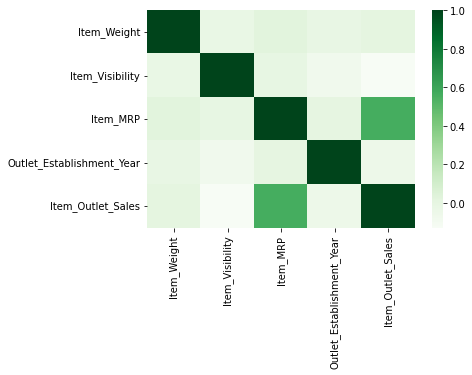

In [112]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens')

#So a very interesting finding from the correlations matrix.  There is a relatively strong correlation between Item_MRP and Item_Outlet_Sales, telling me that we are seeing 
#very real price elasticity in what people are willing to purchase.  One thing that is contrarian to most incoming assumptions with the data set is that there is very
#little strength in the correlation between Item Outlet Sales and Item Visibility.  Given the wide The data, at this time, is telling us it is not so important that people see your product, 
# only that it must fall into the right price point if they do.  

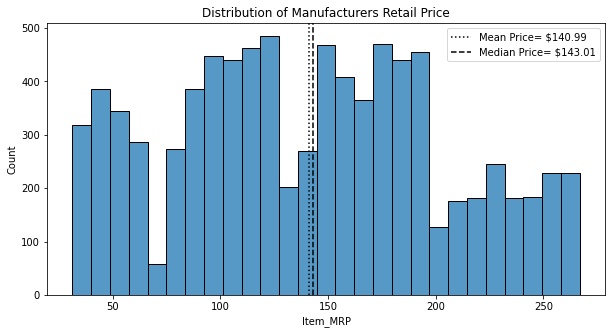

In [113]:
# So let's plot the ditribution of Item MRPs. 



## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_MRP', stat='count');
ax.set(title='Distribution of Manufacturers Retail Price');

## Annotating mean and median
mean_price = df['Item_MRP'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = df['Item_MRP'].median()
ax.axvline(med_price,color='k', ls='--', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend();

 # If my hypothesis is tracking, the mean should be 
 #somewhat left of center, as the price elasticity will
 # drive consumers to higher volumes of lower cost goods
 #to extend their purchasing power...it seems as though it is.

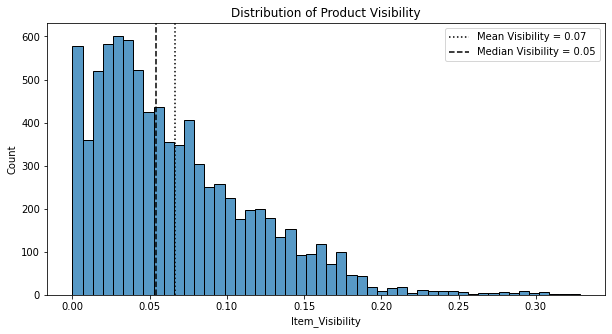

In [114]:
#I am curious about the visibility statistics...



## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Visibility', stat='count');
ax.set(title='Distribution of Product Visibility');

## Annotating mean and median
mean_price = df['Item_Visibility'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Visibility = {round(mean_price,2)}");

med_price = df['Item_Visibility'].median()
ax.axvline(med_price,color='k', ls='--', 
           label=f"Median Visibility = {round(med_price,2)}");

ax.legend();


# Well that's interesting...the distribution is an F-Distribution and not a normalized 
# distribution.  this explains the weak correlation value, but I am curious about the
# percentage of sales generated fromItem Visibility scores above 0.20.

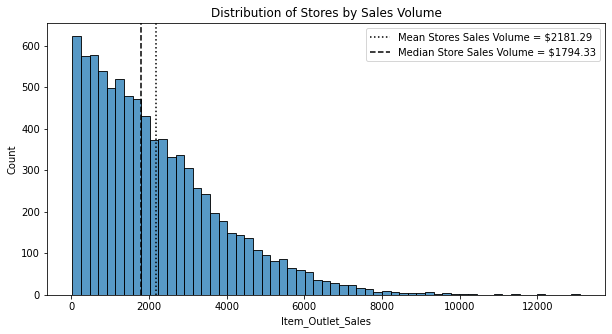

In [115]:
#sales_to_visibility_filter = df.groupby(['MRP'])['Item_Outlet_Sales']>=0.20
outlets = df.groupby('Outlet_Identifier')


## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Outlet_Sales')
ax.set(title='Distribution of Stores by Sales Volume');

## Annotating mean and median
mean_price = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Stores Sales Volume = ${round(mean_price,2)}");

med_price = df['Item_Outlet_Sales'].median()
ax.axvline(med_price,color='k', ls='--', 
           label=f"Median Store Sales Volume = ${round(med_price,2)}");

ax.legend();

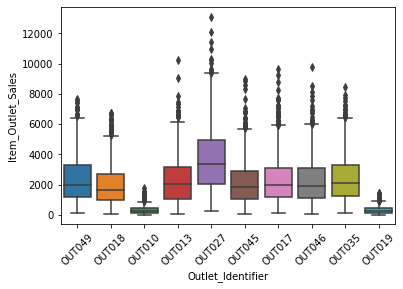

In [116]:
sns.boxplot(data=df, x='Outlet_Identifier', y='Item_Outlet_Sales',);
plt.xticks(rotation=45);

This chart actually gives us some very important information!  Earlier we identified a significant amount of missing data values for the 'Outlet Size' feature.  It is very hard to read in this format, so I will use an im,proved version below for explanation.

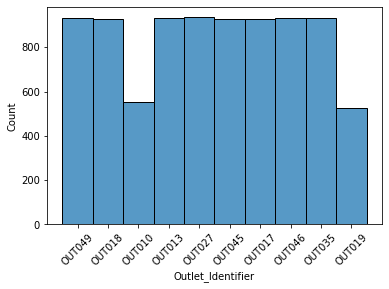

In [117]:
sns.histplot(data=df, x='Outlet_Identifier',);
plt.xticks(rotation=45);

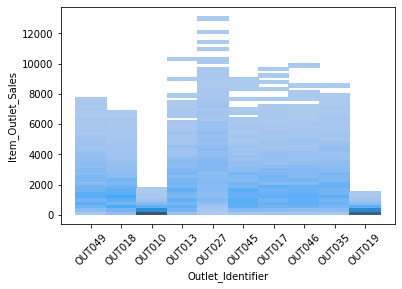

In [118]:
sns.histplot(data=df, x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.xticks(rotation=45);

This chart has the better visulaiztion for the boxplot above.  As you can clearly see, OUT010 and OUT019 both have dramatically lower overall sales volume and a clear concetration of outlets with not only low sales volume but low part counts (the dark blue shading at the bottom).  This is indicative of a small outlet, that through their small product portfolio can only generate a limited number of sales.  This information will allow us to better cleanse our data of over 1000 of the 

#Week 5 - Machine Learning Preprocessing

FIrst, I'll need to look at the info and check on the state of things.

In [119]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn import set_config
set_config(display='diagram')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [121]:
df.drop(columns = ['Item_Identifier','Item_Weight','Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Visibility            8523 non-null   float64
 1   Item_MRP                   8523 non-null   float64
 2   Outlet_Establishment_Year  8523 non-null   int64  
 3   Outlet_Size                6113 non-null   object 
 4   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 333.1+ KB


[Edit: I'm going to hold off on the below, but I'll leave it here in case I see that I need it later.]

Alright, I'll have to adjust the Ordinal values in the Outlet Size column.  I believe this to be an ordinal column because there is nop numeric value in the dataset, such as square footage, that would be able to give a weight in the model relative to size

In [122]:
#df['Outlet_Size'].value_counts()

Let's split our data set,  Then we cqan begin our pipelines and transformations.

In [123]:
# Instantiate Train Test Split
# The assignment callouts for Target and Features assignment 
# is in direct contrast to industry protocols, and as usch I will not be adhering
# to that request.  My targets will be in y and my Features in X.

# Instantiate and select the target
y = df['Item_Outlet_Sales']

# Instatiate and select the features
X = df.drop(columns='Item_Outlet_Sales')

# Set TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size
4776,0.029565,256.4646,2009,Medium
7510,0.000000,179.7660,2009,Medium
5828,0.158716,157.2946,1999,Medium
5327,0.014628,82.3250,2004,Small
4810,0.016645,120.9098,2002,NaN
...,...,...,...,...
5734,0.286345,139.1838,1998,NaN
5191,0.117575,75.6670,2007,NaN
5390,0.018944,237.3590,2002,NaN
860,0.054363,117.9466,2007,NaN


Split looks successful.  It's time to Instantiate the column selectors.

In [124]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [125]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

# Scaler
scaler = StandardScaler()

# One Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [126]:
# Numeric Pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [127]:
# Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [128]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fea8c147bd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fea8c147d50>)])

In [129]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fea8c147bd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fea8c147d50>)])

In [130]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [131]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 6)




array([[-0.71277507,  1.82810922,  1.32784893,  0.        ,  1.        ,
         0.        ],
       [-1.29105225,  0.60336888,  1.32784893,  0.        ,  1.        ,
         0.        ],
       [ 1.81331864,  0.24454056,  0.13618724,  0.        ,  1.        ,
         0.        ],
       ...,
       [-0.92052713,  1.52302674,  0.49368575,  0.        ,  1.        ,
         0.        ],
       [-0.2277552 , -0.38377708,  1.0895166 ,  0.        ,  1.        ,
         0.        ],
       [-0.95867683, -0.73836105, -0.10214509,  0.        ,  0.        ,
         1.        ]])

Yeah, this looks pretty good so far.  By god that dataset is massive.  Good thing the machine will be doing the learning with that many columns (I know it's mostly due to the One Hot Encoding)!

# Regression

In [132]:
#Build a linear regression model. Evaluate the performance of your model based on r^2. Evaluate the performance of your model based on rmse.

In [133]:
#Make an instance of the Linear Regression Model
reg = LinearRegression()

In [134]:
#   train our linear regression model on the training data.
reg.fit(X_train_processed,y_train)

LinearRegression()

In [135]:
# To obtain the predictions of the train set
train_preds = reg.predict(X_train_processed)
# To obtain the predictions of the test set
test_preds = reg.predict(X_test_processed)

In [136]:
#  check the R^2 score for the training set:
train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(train_score)
print(test_score) 

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_train)
print(mae_test)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_train)
print(mse_test)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

0.3553295433207919
0.3458992702579631
0.3553295433207919
0.3458992702579631
1027.5206900021794
1005.2902809065015
1907873.660559024
1804649.0572960386
1381.257999274221
1343.3722705549785


A 36% match.  

# Regression Tree Model
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model. Compare the performance of your model based on r^2. Compare the performance of your model based on rmse.

In [137]:
#Build an instance of your model
bagreg = BaggingRegressor(n_estimators = 100, random_state = 42)

# Look at the hyperparameters
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [138]:
bagreg.fit(X_train_processed, y_train)

BaggingRegressor(n_estimators=100, random_state=42)

In [139]:
bagreg.fit(X_train_processed, y_train)

BaggingRegressor(n_estimators=100, random_state=42)

In [140]:
bagreg.predict(X_test_processed)

array([ 811.523646,  745.469628,  554.757876, ..., 3957.1823  ,
       2163.909922, 2312.02379 ])

In [141]:
# Stgep 5: Evaluate the model performance:

bagreg_train_score = bagreg.score(X_train_processed, y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

#  check the R^2 score for the training set:
train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(train_score)
print(test_score) 

bagreg_r2_train = r2_score(y_train, train_preds)
bagreg_r2_test = r2_score(y_test, test_preds)
print(bagreg_r2_train)
print(bagreg_r2_test)

bagreg_mae_train = mean_absolute_error(y_train, train_preds)
bagreg_mae_test = mean_absolute_error(y_test, test_preds)
print(bagreg_mae_train)
print(bagreg_mae_test)

bagreg_mse_train = mean_squared_error(y_train, train_preds)
bagreg_mse_test = mean_squared_error(y_test, test_preds)
print(bagreg_mse_train)
print(bagreg_mse_test)

bagreg_rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
bagreg_rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

0.9364124898089946
0.549130869109294
0.3553295433207919
0.3458992702579631
0.3553295433207919
0.3458992702579631
1027.5206900021794
1005.2902809065015
1907873.660559024
1804649.0572960386
1381.257999274221
1343.3722705549785


Run 1:

0.9278218979158627

0.5373746660067594

Needs serious tuning.

Run 2 (Parameter Adjust: n_estimaors = 50)

0.9354451124061893

0.5465621330506721

Run 2 (Parameter Adjust: n_estimaors = 100)

0.9377775831517625

0.5502263582728071

#  Random Forest

In [142]:
#Inatantiate your model
rf = RandomForestRegressor(max_depth = 150, n_estimators = 100, random_state = 42)

In [143]:
# Check for tunable parameters

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 150,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [144]:
# Fit your model

rf.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=150, random_state=42)

In [145]:
rf.predict(X_test_processed)

array([ 799.22632 ,  749.62422 ,  583.44054 , ..., 3866.70008 ,
       2219.091426, 2320.77906 ])

In [146]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

# Evaluate the model performance:

rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

rf_r2_train = r2_score(y_train, train_preds)
rf_r2_test = r2_score(y_test, test_preds)
print(rf_r2_train)
print(rf_r2_test)

rf_mae_train = mean_absolute_error(y_train, train_preds)
rf_mae_test = mean_absolute_error(y_test, test_preds)
print(rf_mae_train)
print(rf_mae_test)

rf_mse_train = mean_squared_error(y_train, train_preds)
rf_mse_test = mean_squared_error(y_test, test_preds)
print(rf_mse_train)
print(rf_mse_test)

rf_rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

0.9362399476939753
0.5494823964732938
0.9362399476939753
0.5494823964732938
0.3553295433207919
0.3458992702579631
1027.5206900021794
1005.2902809065015
1907873.660559024
1804649.0572960386
1381.257999274221
1343.3722705549785


Executive summary:

Looked into all available data features for those impactful via a high correlation, and reoved the others.
